<a href="https://colab.research.google.com/github/Harsha1569/DSP_Lab/blob/main/Experiment_7/Experiment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Note: Roll Number = 191EE123 <br> a = 1 + mod(123,3) = 1

In [1]:
import numpy as np
import IPython
import scipy
import math
import pandas as pd
import io
from IPython.display import Audio, display
from scipy.signal import chirp, spectrogram
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
from scipy import signal as sp
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.signal import find_peaks



a = 1
pi = np.pi


%matplotlib inline
plt.style.use(['seaborn-notebook'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (15, 8),
    "axes.labelsize": 15,
    "font.size": 8})
!pip install control

import control

     |████████████████████████████████| 339 kB 4.1 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344928 sha256=36be9258282791216a85f230c019b06e27e3c0b1b294a631e282528b21d8a9c8
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control


# **Problem** **1**. <br>
Part 1: <br>

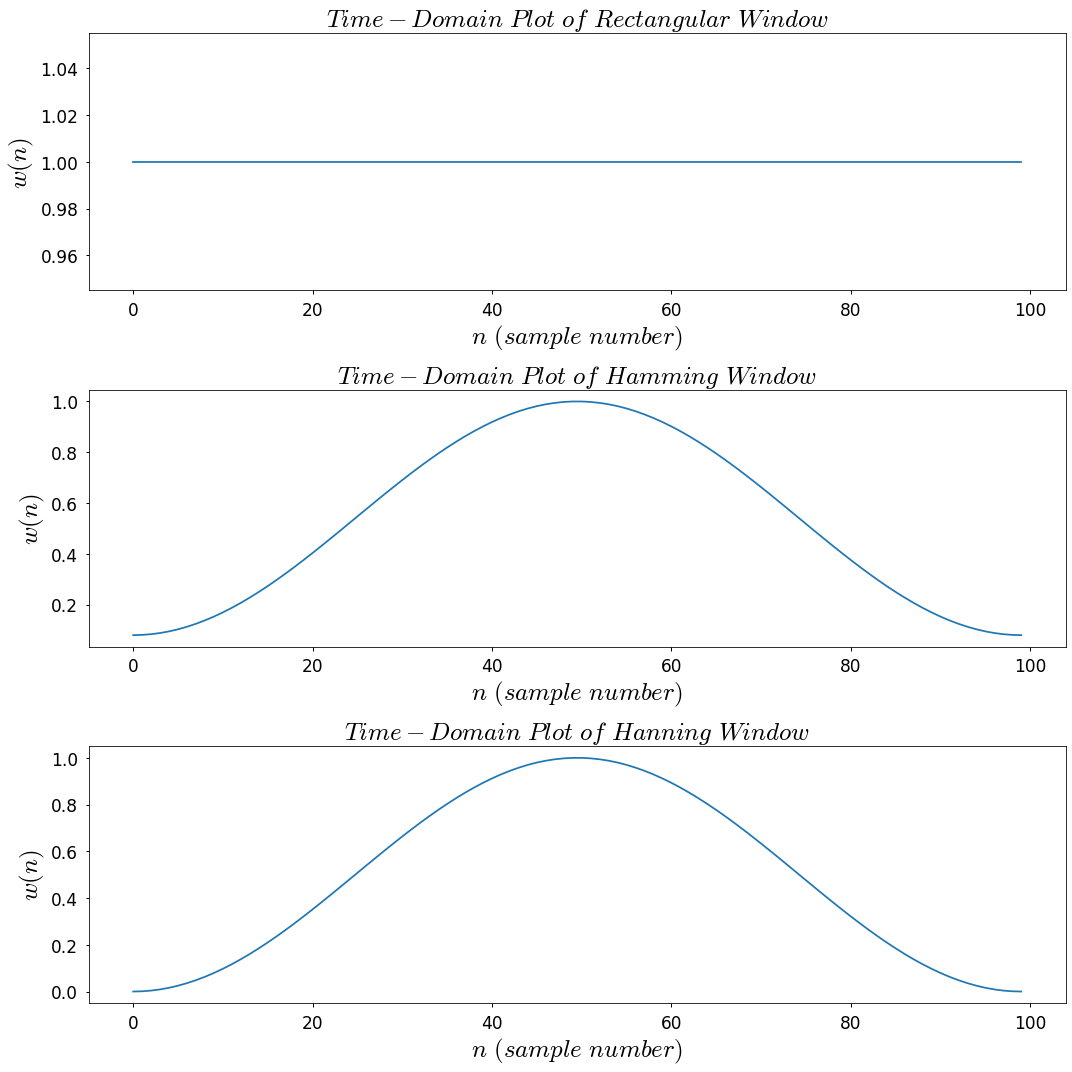

In [7]:
n=np.arange(0, 100)
t1= ['$Time-Domain\ Plot\ of\ Rectangular\ Window$',
          '$Time-Domain\ Plot\ of\ Hamming\ Window$',
          '$Time-Domain\ Plot\ of\ Hanning\ Window$']
fig1, axs1 = plt.subplots(3, figsize=(15,15))
def plot_signal_1(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs1[row].plot(x, y)
    axs1[row].set_title(t1[row], fontsize = 25)
    axs1[row].set_xlabel(xaxis_label, fontsize = 25)
    axs1[row].set_ylabel(yaxis_label, fontsize = 25)
    axs1[row].tick_params(axis="both", labelsize = 17)
    fig1.tight_layout()

plot_signal(n, sp.windows.boxcar(100), xaxis_label= r'$n\ (sample\ number)$', yaxis_label=r'$w(n)$', row=0)
plot_signal(n, sp.windows.hamming(100), xaxis_label= r'$n\ (sample\ number)$', yaxis_label=r'$w(n)$', row=1)
plot_signal(n, sp.windows.hann(100), xaxis_label= r'$n\ (sample\ number)$', yaxis_label=r'$w(n)$', row=2)
fig1.savefig('fig1.png')

Part 2:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log10


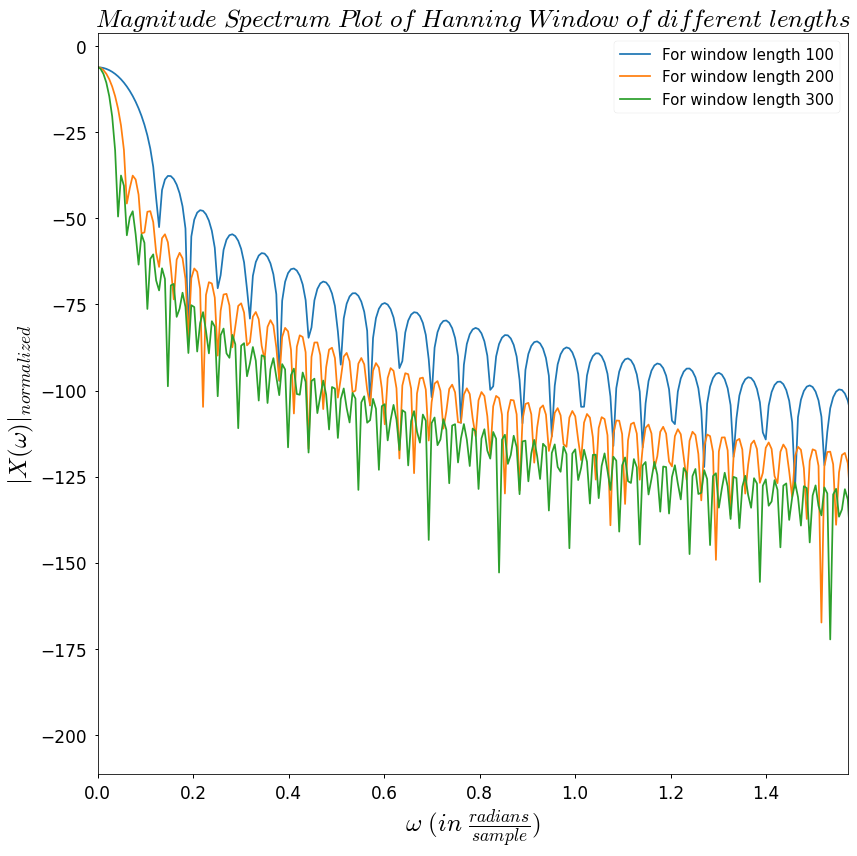

In [19]:
N = 1024
fig2, axs2 = plt.subplots(1, figsize=(12,12))
def plot_signal_2(x, y, label =None, title=None, xaxis_label=None, yaxis_label=None, row=None):  
    axs2.plot(x, y, label = label )
    axs2.set_xlim(0, np.pi/2)
    axs2.set_title(title, fontsize = 25)
    axs2.set_xlabel(xaxis_label, fontsize = 25)
    axs2.set_ylabel(yaxis_label, fontsize = 25)
    axs2.tick_params(axis="both", labelsize = 17)
    axs2.legend(loc = 'upper right', fontsize = 15)
    fig2.tight_layout()

def spec(L, N, title=None, wrange=None, label=None):
    w=sp.windows.hann(L)
    #print(w.shape)
    k=np.arange(0, N)
    W=fft(w, n=N)
    #wlims=(0, np.pi)
    #if wrange:
        #wlims=wrange
    plot_signal_2(k*2*np.pi/N, 20*np.log10(np.abs(W)/L), label=label, title=title, xaxis_label=r'$\omega\ (in\ \frac{radians}{sample})$', yaxis_label=r'$|X(\omega)|_{normalized}$')
    
l = [100,200,300]
label = ['For window length 100', 'For window length 200', 'For window length 300']
spec(l[0], N, title=(r'$Magnitude Spectrum Plot of Hanning Windows of different lengths$'), label=label[0])
spec(l[1], N, title=(r'$Magnitude Spectrum Plot of Hanning Windows of different lengths$'), label=label[1])
spec(l[2], N, title=(r'$Magnitude\ Spectrum\ Plot\ of\ Hanning\ Window\ of\ different\ lengths$'), label=label[2])

fig2.savefig('fig2.png')